In [1]:
#Importar bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

import skfda

from skfda.ml.clustering import KMeans

In [2]:
# Ler ficheiros

TabelaTempo=pd.read_excel("C:/Users/Guilherme/Desktop/KcTime.xlsx")
TabelaNDVI=pd.read_excel("C:/Users/Guilherme/Desktop/KcNDVI.xlsx")
TabelaMilho=pd.read_csv("C:/Users/Guilherme/Desktop/CulturasCordBOM/dfMILHO.csv")

In [3]:
TabelaMilho.head()

,ID,DATA,Cultura,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633


In [4]:
#apenas para o artigo
TabelaMilhoartigo= TabelaMilho.rename({'DATA': 'DATE', 'Cultura': 'Crop'}, axis=1) 

In [5]:
TabelaMilhoartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633
...,...,...,...,...,...,...
463756,44793426,2022-01-04,MILHO (Sequeiro),0.0291,39.324599,-8.524624
463757,44793426,2022-01-09,MILHO (Sequeiro),0.1501,39.324599,-8.524624
463758,44793426,2022-01-14,MILHO (Sequeiro),0.2711,39.324599,-8.524624
463759,44793426,2022-01-19,MILHO (Sequeiro),0.3927,39.324599,-8.524624


In [6]:
TabelaMilhoartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633
...,...,...,...,...,...,...
463756,44793426,2022-01-04,MILHO (Sequeiro),0.0291,39.324599,-8.524624
463757,44793426,2022-01-09,MILHO (Sequeiro),0.1501,39.324599,-8.524624
463758,44793426,2022-01-14,MILHO (Sequeiro),0.2711,39.324599,-8.524624
463759,44793426,2022-01-19,MILHO (Sequeiro),0.3927,39.324599,-8.524624


In [7]:
TabelaMilhoartigo.set_index(["ID","DATE"]).sort_index()

Crop  NDVI_MED        Lat       Lon
ID       DATE                                                       
26742    2020-09-01  MILHO (Sequeiro)    0.6511  39.490351 -8.921633
         2020-09-06  MILHO (Sequeiro)    0.4831  39.490351 -8.921633
         2020-09-11  MILHO (Sequeiro)    0.6104  39.490351 -8.921633
         2020-09-16  MILHO (Sequeiro)    0.6390  39.490351 -8.921633
         2020-09-21  MILHO (Sequeiro)    0.5985  39.490351 -8.921633
...                               ...       ...        ...       ...
44825588 2022-01-04  MILHO (Sequeiro)    0.3599  39.015530 -8.919679
         2022-01-09  MILHO (Sequeiro)    0.3568  39.015530 -8.919679
         2022-01-14  MILHO (Sequeiro)    0.3613  39.015530 -8.919679
         2022-01-19  MILHO (Sequeiro)    0.3516  39.015530 -8.919679
         2022-01-24  MILHO (Sequeiro)    0.3471  39.015530 -8.919679

[463761 rows x 4 columns]

In [8]:
TabelaMilhoartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633
...,...,...,...,...,...,...
463756,44793426,2022-01-04,MILHO (Sequeiro),0.0291,39.324599,-8.524624
463757,44793426,2022-01-09,MILHO (Sequeiro),0.1501,39.324599,-8.524624
463758,44793426,2022-01-14,MILHO (Sequeiro),0.2711,39.324599,-8.524624
463759,44793426,2022-01-19,MILHO (Sequeiro),0.3927,39.324599,-8.524624


In [9]:
TabelaMilho

,ID,DATA,Cultura,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633
...,...,...,...,...,...,...
463756,44793426,2022-01-04,MILHO (Sequeiro),0.0291,39.324599,-8.524624
463757,44793426,2022-01-09,MILHO (Sequeiro),0.1501,39.324599,-8.524624
463758,44793426,2022-01-14,MILHO (Sequeiro),0.2711,39.324599,-8.524624
463759,44793426,2022-01-19,MILHO (Sequeiro),0.3927,39.324599,-8.524624


In [10]:
TabelaTempo.head()

,Crop,Init. (Lini),Dev. (Ldev),Mid (Lmid),Late (Llate),Total,Plant Date
0,Broculos,35,45,40,15,135,Set
1,Couve_repolho,40,60,50,15,165,Set
2,Cenoura,30,40,60,20,150,Feb_Mar
3,Couveflor,35,50,40,15,140,Set
4,Salsao_aipo,25,40,45,15,125,Abr


In [11]:
TabelaNDVI.head()

,Crop,Kc ini,Kc mid,Kc end
0,Broculos,0.7,1.05,0.95
1,Couve_repolho,0.7,1.05,0.95
2,Cenoura,0.7,1.05,0.95
3,Couveflor,0.7,1.05,0.95
4,Salsao_aipo,0.7,1.05,1.00


In [12]:
TabelaMilho=TabelaMilho.drop("Cultura", axis=1)

In [13]:
TabelaMilho2=TabelaMilho.set_index(["ID","DATA"]).sort_index()

In [14]:
# Representacao de todas as series/poligonos (apenas para verificacao)
pio.renderers.default = 'iframe'
px.line(
    TabelaMilho2.reset_index(),
    x="DATA",
    y="NDVI_MED",
    color="ID",
).update_layout(xaxis={"type": "category"},xaxis_title="DATE",yaxis_title="NDVI")

In [15]:
TabelaMilho3=TabelaMilho2.reset_index()

In [16]:
# A mesma representacao anterior
TabelaMilho3.set_index("DATA", inplace=True)
#TabelaMilho3.groupby("ID")["NDVI_MED"].plot(legend=True, xlabel="DATA", ylabel="NDVI_MED",figsize=(8,6))

In [17]:
TabelaMilho3=TabelaMilho3.reset_index()

In [18]:
df = TabelaMilho3.pivot(index='DATA', columns='ID', values='NDVI_MED')

In [19]:
df

ID,26742,142399,147088,270735,270992,453335,744056,842397,1305223,1305481,...,44805278,44812160,44812167,44816601,44819099,44821958,44823713,44825583,44825584,44825588
DATA,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.6511,0.4860,0.4605,0.3381,0.2624,0.3406,NaN,0.5644,0.2017,0.2637,...,0.1683,0.6862,0.3003,0.9088,0.1563,0.8349,0.7884,0.2633,0.2899,0.2914
2020-09-06,0.4831,0.4275,0.4369,0.3170,0.2761,0.3114,0.8937,0.5192,0.2062,0.2105,...,0.1677,0.6978,0.3017,0.8832,0.1566,0.8655,0.8950,0.2672,0.3139,0.3138
2020-09-11,0.6104,0.4395,0.4621,0.2959,0.2233,0.3318,0.8812,0.5419,0.2260,0.2265,...,0.1718,0.7125,0.3050,0.7188,0.2206,0.8809,0.8240,0.2984,0.3628,0.3570
2020-09-16,0.6390,0.4362,0.4834,0.2776,0.0838,0.3398,0.8682,0.5659,0.2755,0.2325,...,0.1888,0.6955,0.3080,0.7668,0.2846,0.8559,0.8720,0.3184,0.4048,0.3889
2020-09-21,0.5985,0.4250,0.5190,0.2621,0.3465,0.3859,0.8552,0.5896,0.3248,0.2388,...,0.2061,0.6785,0.3111,0.8148,0.3486,0.8309,0.9202,0.3625,0.4375,0.4086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,0.0319,0.0225,0.0187,0.4945,0.8501,0.6693,0.2268,0.5161,0.0146,0.0228,...,0.0208,0.2008,0.3290,0.1871,0.4753,0.1757,0.5990,0.4551,0.4619,0.3599
2022-01-09,0.2819,0.4198,0.8107,0.4932,0.8714,0.6120,0.2368,0.5361,0.1366,0.1153,...,0.1418,0.2053,0.3320,0.1871,0.3793,0.1712,0.6275,0.4895,0.4981,0.3568
2022-01-14,0.5319,0.3903,0.8142,0.5002,0.8799,0.7385,0.2468,0.5561,0.2586,0.2078,...,0.2628,0.2098,0.3350,0.1871,0.2833,0.1667,0.6560,0.4980,0.5061,0.3613


In [20]:
df.index

Index(['2020-09-01', '2020-09-06', '2020-09-11', '2020-09-16', '2020-09-21',
       '2020-09-26', '2020-10-01', '2020-10-06', '2020-10-11', '2020-10-16',
       ...
       '2021-12-10', '2021-12-15', '2021-12-20', '2021-12-25', '2021-12-30',
       '2022-01-04', '2022-01-09', '2022-01-14', '2022-01-19', '2022-01-24'],
      dtype='object', name='DATA', length=103)

In [21]:
import datetime
from datetime import datetime, timedelta, time, date

In [22]:
#criação de uma lista do número de dias  
timelist=[]
i=0
for x in df.index.values:
    date_format = "%Y-%m-%d"
    a = datetime.strptime(df.index.values[0], date_format)
    b = datetime.strptime(df.index.values[i], date_format)
    delta = b - a
    timelist.append(delta.days)
    i=i+1

In [23]:
timelist

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500,
 505,
 510]

In [24]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [25]:
#Conversão de 5 dias para 1 dia
df=df.resample('D').interpolate(method='linear')

In [26]:
# Remocao de NaN
df=df.interpolate(method="linear")
df=df.bfill(axis ='rows')
df=df.ffill(axis ='rows')

In [27]:
df.index

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10',
               ...
               '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24'],
              dtype='datetime64[ns]', name='DATA', length=511, freq='D')

In [28]:
df_trans=df.T

In [29]:
TabelaMilho.head()

,ID,DATA,NDVI_MED,Lat,Lon
0,26742,2020-09-01,0.6511,39.490351,-8.921633
1,26742,2020-09-06,0.4831,39.490351,-8.921633
2,26742,2020-09-11,0.6104,39.490351,-8.921633
3,26742,2020-09-16,0.6390,39.490351,-8.921633
4,26742,2020-09-21,0.5985,39.490351,-8.921633


In [30]:
#Ver apenas os ID únicos
TabelaMilhoUnique=TabelaMilho.drop_duplicates(subset=['ID'])

In [31]:
TabelaMilhoUnique.drop(['DATA', 'NDVI_MED'], axis=1, inplace=True)

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_9492\3247887478.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
TabelaMilhoUnique

,ID,Lat,Lon
0,26742,39.490351,-8.921633
103,142399,39.689617,-8.822106
206,147088,39.654462,-8.750712
309,270735,39.674235,-8.703391
407,270992,39.682310,-8.693551
...,...,...,...
463281,44693605,39.494279,-8.586319
463377,44713235,39.386970,-8.466177
463473,44752766,39.348913,-8.524470
463569,44793424,39.323011,-8.522392


In [33]:
TabelaMilhoUnique2=TabelaMilhoUnique
TabelaMilhoUnique2['Size']=10

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_9492\1177385422.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
TabelaMilhoUnique2

,ID,Lat,Lon,Size
0,26742,39.490351,-8.921633,10
103,142399,39.689617,-8.822106,10
206,147088,39.654462,-8.750712,10
309,270735,39.674235,-8.703391,10
407,270992,39.682310,-8.693551,10
...,...,...,...,...
463281,44693605,39.494279,-8.586319,10
463377,44713235,39.386970,-8.466177,10
463473,44752766,39.348913,-8.524470,10
463569,44793424,39.323011,-8.522392,10


In [35]:
import plotly.express as px
fig = px.scatter_geo(TabelaMilhoUnique2, lat="Lat", lon="Lon", color="ID",
                     hover_name="ID", size="Size",
                     projection="natural earth")
fig.show()

In [36]:
df_trans

DATA,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,...,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
ID,,,,,,,,,,,,,,,,,,,,,
26742,0.6511,0.61750,0.58390,0.55030,0.51670,0.4831,0.50856,0.53402,0.55948,0.58494,...,0.56278,0.59366,0.62454,0.65542,0.6863,0.67668,0.66706,0.65744,0.64782,0.6382
142399,0.4860,0.47430,0.46260,0.45090,0.43920,0.4275,0.42990,0.43230,0.43470,0.43710,...,0.38516,0.38002,0.37488,0.36974,0.3646,0.35688,0.34916,0.34144,0.33372,0.3260
147088,0.4605,0.45578,0.45106,0.44634,0.44162,0.4369,0.44194,0.44698,0.45202,0.45706,...,0.81710,0.82000,0.82290,0.82580,0.8287,0.79526,0.76182,0.72838,0.69494,0.6615
270735,0.3381,0.33388,0.32966,0.32544,0.32122,0.3170,0.31278,0.30856,0.30434,0.30012,...,0.50596,0.51172,0.51748,0.52324,0.5290,0.52174,0.51448,0.50722,0.49996,0.4927
270992,0.2624,0.26514,0.26788,0.27062,0.27336,0.2761,0.26554,0.25498,0.24442,0.23386,...,0.87608,0.87226,0.86844,0.86462,0.8608,0.85224,0.84368,0.83512,0.82656,0.8180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44821958,0.8349,0.84102,0.84714,0.85326,0.85938,0.8655,0.86858,0.87166,0.87474,0.87782,...,0.16580,0.16490,0.16400,0.16310,0.1622,0.16126,0.16032,0.15938,0.15844,0.1575
44823713,0.7884,0.80972,0.83104,0.85236,0.87368,0.8950,0.88080,0.86660,0.85240,0.83820,...,0.66168,0.66736,0.67304,0.67872,0.6844,0.63266,0.58092,0.52918,0.47744,0.4257
44825583,0.2633,0.26408,0.26486,0.26564,0.26642,0.2672,0.27344,0.27968,0.28592,0.29216,...,0.49704,0.49608,0.49512,0.49416,0.4932,0.48786,0.48252,0.47718,0.47184,0.4665


In [37]:
df_trans[:10]

DATA,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,...,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
ID,,,,,,,,,,,,,,,,,,,,,
26742,0.6511,0.61750,0.58390,0.55030,0.51670,0.4831,0.50856,0.53402,0.55948,0.58494,...,0.56278,0.59366,0.62454,0.65542,0.6863,0.67668,0.66706,0.65744,0.64782,0.6382
142399,0.4860,0.47430,0.46260,0.45090,0.43920,0.4275,0.42990,0.43230,0.43470,0.43710,...,0.38516,0.38002,0.37488,0.36974,0.3646,0.35688,0.34916,0.34144,0.33372,0.3260
147088,0.4605,0.45578,0.45106,0.44634,0.44162,0.4369,0.44194,0.44698,0.45202,0.45706,...,0.81710,0.82000,0.82290,0.82580,0.8287,0.79526,0.76182,0.72838,0.69494,0.6615
270735,0.3381,0.33388,0.32966,0.32544,0.32122,0.3170,0.31278,0.30856,0.30434,0.30012,...,0.50596,0.51172,0.51748,0.52324,0.5290,0.52174,0.51448,0.50722,0.49996,0.4927
270992,0.2624,0.26514,0.26788,0.27062,0.27336,0.2761,0.26554,0.25498,0.24442,0.23386,...,0.87608,0.87226,0.86844,0.86462,0.8608,0.85224,0.84368,0.83512,0.82656,0.8180
453335,0.3406,0.33476,0.32892,0.32308,0.31724,0.3114,0.31548,0.31956,0.32364,0.32772,...,0.75420,0.76990,0.78560,0.80130,0.8170,0.80702,0.79704,0.78706,0.77708,0.7671
744056,0.8937,0.89370,0.89370,0.89370,0.89370,0.8937,0.89120,0.88870,0.88620,0.88370,...,0.24882,0.25084,0.25286,0.25488,0.2569,0.25690,0.25690,0.25690,0.25690,0.2569
842397,0.5644,0.55536,0.54632,0.53728,0.52824,0.5192,0.52374,0.52828,0.53282,0.53736,...,0.56022,0.56434,0.56846,0.57258,0.5767,0.55614,0.53558,0.51502,0.49446,0.4739
1305223,0.2017,0.20260,0.20350,0.20440,0.20530,0.2062,0.21016,0.21412,0.21808,0.22204,...,0.28286,0.30712,0.33138,0.35564,0.3799,0.37534,0.37078,0.36622,0.36166,0.3571


In [38]:
df_trans.values[0:20]

array([[0.6511 , 0.6175 , 0.5839 , ..., 0.65744, 0.64782, 0.6382 ],
       [0.486  , 0.4743 , 0.4626 , ..., 0.34144, 0.33372, 0.326  ],
       [0.4605 , 0.45578, 0.45106, ..., 0.72838, 0.69494, 0.6615 ],
       ...,
       [0.2675 , 0.25864, 0.24978, ..., 0.45652, 0.44686, 0.4372 ],
       [0.5057 , 0.50676, 0.50782, ..., 0.4495 , 0.4403 , 0.4311 ],
       [0.6175 , 0.59772, 0.57794, ..., 0.34588, 0.34144, 0.337  ]])

In [39]:
df_trans.index

Int64Index([   26742,   142399,   147088,   270735,   270992,   453335,
              744056,   842397,  1305223,  1305481,
            ...
            44805278, 44812160, 44812167, 44816601, 44819099, 44821958,
            44823713, 44825583, 44825584, 44825588],
           dtype='int64', name='ID', length=4779)

In [40]:
#lista de listas das séries
lista_series=[]

for x in df_trans.values:
    lista_series.append(x)

In [41]:
type(lista_series[0][0])

numpy.float64

In [42]:
lista_series[0].shape

(511,)

In [43]:
w = 5
p = 2

In [44]:
import scipy.signal as ss
from scipy.signal import savgol_filter, general_gaussian

In [45]:
#Aplicação do filtro Sav-Gol
lista_filtro=[]
for x in lista_series:
    lista_filtro.append(savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0))

In [46]:
df_filtro = pd.DataFrame(data=lista_filtro, index=df_trans.index)

In [47]:
df_filtro2=df_filtro.T

In [48]:
df_filtro2

ID,26742,142399,147088,270735,270992,453335,744056,842397,1305223,1305481,...,44805278,44812160,44812167,44816601,44819099,44821958,44823713,44825583,44825584,44825588
0,0.661483,0.491152,0.462796,0.338874,0.280677,0.341934,0.893962,0.566851,0.202620,0.266664,...,0.168609,0.685990,0.300096,0.897771,0.158309,0.834955,0.778134,0.265374,0.289891,0.291616
1,0.610435,0.470083,0.453982,0.333155,0.247293,0.333962,0.893312,0.553525,0.201668,0.250811,...,0.167855,0.688909,0.300793,0.912127,0.154959,0.841040,0.817433,0.262297,0.294906,0.295861
2,0.568730,0.456213,0.447957,0.328863,0.248641,0.326757,0.893581,0.542834,0.202443,0.238334,...,0.167724,0.690891,0.301048,0.912878,0.153458,0.847120,0.844659,0.262220,0.299150,0.299815
3,0.538810,0.447176,0.444330,0.325151,0.264244,0.321266,0.893919,0.534861,0.204031,0.229019,...,0.167849,0.692847,0.301168,0.902746,0.154273,0.853191,0.861483,0.264174,0.303711,0.304220
4,0.521354,0.441319,0.442737,0.321498,0.280515,0.317887,0.893816,0.529546,0.205959,0.222567,...,0.168048,0.695202,0.301342,0.884585,0.157581,0.859099,0.869770,0.267423,0.309208,0.309470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.664899,0.342794,0.763474,0.520540,0.851834,0.804448,0.256770,0.552925,0.371441,0.298932,...,0.379522,0.212842,0.329404,0.187644,0.189555,0.161235,0.628287,0.487455,0.511470,0.350937
507,0.679291,0.361810,0.793723,0.517175,0.844080,0.801415,0.257209,0.541294,0.376810,0.306868,...,0.387127,0.211471,0.323899,0.188333,0.185025,0.160343,0.590478,0.483169,0.508371,0.349258
508,0.685265,0.376785,0.809554,0.511013,0.835680,0.793963,0.257262,0.524456,0.376322,0.311359,...,0.389468,0.209447,0.316873,0.189234,0.184204,0.159440,0.541530,0.478106,0.503604,0.347983
509,0.670254,0.365456,0.764779,0.501919,0.826815,0.781282,0.257027,0.500442,0.368059,0.310852,...,0.384714,0.206838,0.308531,0.190327,0.186603,0.158492,0.482875,0.472310,0.497002,0.347400


# Criação da Curva Teórica de Kc

In [49]:
TabelaNDVI["Crop"].unique()

array(['Broculos', 'Couve_repolho', 'Cenoura', 'Couveflor', 'Salsao_aipo',
       'Cruciferas_abril (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Cruciferas_fevereiro (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Cruciferas_outubro_novembro (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Alface_abril', 'Alface_novembro_janeiro',
       'Alface_outobro_novembro', 'Alface_fevereiro', 'Cebola (seca)',
       'Cebola (verde)', 'Cebola (semente)', 'Espinafre', 'Rabanete',
       'Berinjela', 'Pimentaodoce', 'Tomate', 'Cantalupo_meloa_janeiro',
       'Cantalupo_meloa_agosto', 'Pepino_junho_agosto',
       'Pepino_novembro__fevereiro', 'Abobora',
       'Corgette_abobrinha_abril__dezembro',
       'Corgette_abobrinha_maio_junho', 'Melao', 'Melancia',
       'Beterraba_abril_maio', 'Beterraba_fevereiro_marco',
       'Batata_janeiro__novembro', 'Batata_maio', 'Batata_abril',
       'Batatadoce', 'Beterraba_maio', 'Beterraba_novembro',
       'Grao

In [50]:
TabelaNDVIMilho=TabelaNDVI[(TabelaNDVI['Crop']=="Milhograo")]

In [51]:
kc_ini=float(TabelaNDVIMilho["Kc ini"].values)

In [52]:
TabelaTempoMilho=TabelaTempo[(TabelaTempo['Crop']=="Milhograo")]

In [53]:
temp_ini=int(TabelaTempoMilho["Init. (Lini)"].values)

In [54]:
listaInit=[kc_ini]*temp_ini

In [55]:
listaInit

[0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3]

In [56]:
temp_dev=int(TabelaTempoMilho["Dev. (Ldev)"].values)

In [57]:
an_array = np.empty((temp_dev))
an_array[:] = np.NaN

In [58]:
an_array

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

In [59]:
kc_mid=float(TabelaNDVIMilho["Kc mid"].values)
temp_mid=int(TabelaTempoMilho["Mid (Lmid)"].values)

In [60]:
listaMid=[kc_mid]*temp_mid

In [61]:
temp_late=int(TabelaTempoMilho["Late (Llate)"].values)

In [62]:
an_array2 = np.empty((temp_late))
an_array2[:] = np.NaN

In [63]:
kc_end=float(TabelaNDVIMilho["Kc end"].values)

In [64]:
for x in an_array:
    listaInit.append(x)

In [65]:
for x in listaMid:
    listaInit.append(x)

In [66]:
for x in an_array2:
    listaInit.append(x)

In [67]:
listaInit.append(kc_end)

In [68]:
listateoric=listaInit

In [69]:
listateoric

[0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.48]

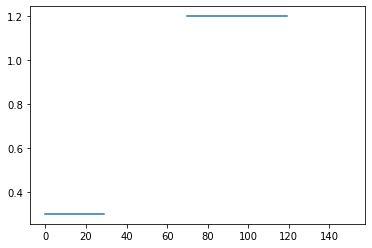

In [70]:
plt.plot(listateoric)

In [71]:
df_kcteoric = pd.DataFrame (listateoric, columns = ['Kcteoric'])

<AxesSubplot:>

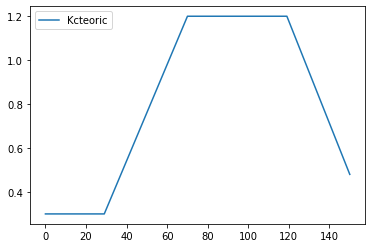

In [72]:
df_kcteoric.interpolate(method="linear").plot()

In [73]:
df_kcteoric=df_kcteoric.interpolate(method="linear")

<AxesSubplot:xlabel='Days', ylabel='Kc'>

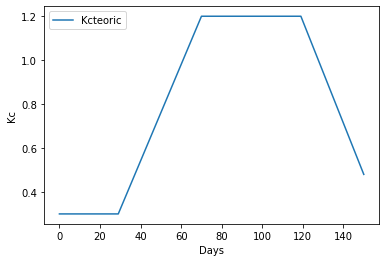

In [74]:
df_kcteoric.plot(xlabel="Days",ylabel="Kc")

# Criação do período melhor representativo utilizando a correlação de Pearson

In [75]:
import scipy.stats as stats

In [76]:
windows=np.lib.stride_tricks.sliding_window_view(df_filtro, 151, axis=1)

In [77]:
len(windows[0][0])

151

In [78]:
z=np.arange(151)
i=0
maxi=[]
corrP=[]
s=0

for z in windows:
    for xi in windows[i]:
        r, p = stats.pearsonr(xi,df_kcteoric['Kcteoric'])
        corrP.append(r)
    aws=np.array(corrP)
    maxi.append(aws.argmax())   
    i=i+1
    corrP=[]
max_array = np.array(maxi)

In [79]:
#max_array

In [80]:
lista_corr=[]
i=0
for x in max_array:
    lista_corr.append(windows[i][x])
    i=i+1

In [81]:
#lista_corr

In [82]:
df_melhor= pd.DataFrame(data=lista_corr, index=df_trans.index)

In [83]:
df_train_melhor=df_melhor[1444:]

In [84]:
df_train_melhor

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
ID,,,,,,,,,,,,,,,,,,,,,
27372538,0.194980,0.192986,0.191101,0.189331,0.187896,0.186686,0.185429,0.183840,0.181470,0.179230,...,0.405929,0.431660,0.462809,0.495549,0.525987,0.550701,0.567283,0.574762,0.573828,0.566718
27373355,0.198478,0.199403,0.201333,0.204019,0.207281,0.210804,0.214253,0.217358,0.219982,0.222152,...,0.501326,0.490345,0.479298,0.469905,0.461523,0.453544,0.445373,0.437943,0.427807,0.415648
27373448,0.188688,0.178671,0.171948,0.168351,0.167314,0.168347,0.170614,0.173197,0.175324,0.176544,...,0.748800,0.727428,0.702372,0.674918,0.648576,0.624197,0.602678,0.584390,0.569867,0.557431
27375514,0.163165,0.160597,0.157185,0.154936,0.153437,0.152205,0.150719,0.149214,0.146450,0.142786,...,0.710844,0.702885,0.689441,0.670864,0.648594,0.624883,0.602948,0.584290,0.571241,0.565870
27377300,0.156457,0.156022,0.155885,0.155820,0.155633,0.155209,0.154536,0.153708,0.152895,0.152275,...,0.649723,0.636898,0.622430,0.606464,0.589966,0.572109,0.553575,0.535607,0.519349,0.504602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44821958,0.208904,0.193140,0.180362,0.171414,0.166299,0.164657,0.166086,0.170863,0.177226,0.183762,...,0.515444,0.490721,0.466861,0.443038,0.418419,0.392672,0.366430,0.339841,0.313590,0.288507
44823713,0.162150,0.156868,0.149513,0.141034,0.132535,0.125099,0.119511,0.115962,0.114586,0.115044,...,0.597929,0.592185,0.588348,0.584141,0.576993,0.564744,0.546472,0.522189,0.492911,0.460518
44825583,0.134134,0.133698,0.132636,0.131321,0.130153,0.129105,0.128346,0.128162,0.128358,0.128681,...,0.667009,0.623351,0.572997,0.524562,0.486136,0.462306,0.456943,0.470509,0.500459,0.541502


In [85]:
df_train_melhor2=df_train_melhor.T

In [86]:
df_train_melhor2

ID,27372538,27373355,27373448,27375514,27377300,27377321,27377323,27377390,27377393,27377452,...,44805278,44812160,44812167,44816601,44819099,44821958,44823713,44825583,44825584,44825588
0,0.194980,0.198478,0.188688,0.163165,0.156457,0.202284,0.174118,0.211198,0.207484,0.177862,...,0.236032,0.215179,0.261090,0.166302,0.106072,0.208904,0.162150,0.134134,0.132938,0.137332
1,0.192986,0.199403,0.178671,0.160597,0.156022,0.202886,0.176230,0.210783,0.195292,0.178837,...,0.237364,0.195156,0.259026,0.168510,0.105282,0.193140,0.156868,0.133698,0.131672,0.137451
2,0.191101,0.201333,0.171948,0.157185,0.155885,0.200903,0.177177,0.209855,0.186293,0.179775,...,0.238752,0.183588,0.257729,0.170736,0.106482,0.180362,0.149513,0.132636,0.130218,0.136831
3,0.189331,0.204019,0.168351,0.154936,0.155820,0.197152,0.176900,0.209003,0.180266,0.180753,...,0.240195,0.180609,0.257292,0.172884,0.109613,0.171414,0.141034,0.131321,0.128949,0.135627
4,0.187896,0.207281,0.167314,0.153437,0.155633,0.193571,0.175878,0.208778,0.176759,0.181643,...,0.241597,0.182172,0.257792,0.174957,0.114868,0.166299,0.132535,0.130153,0.127808,0.134226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.550701,0.453544,0.624197,0.624883,0.572109,0.767003,0.656246,0.487154,0.610604,0.478816,...,0.272239,0.374365,0.253522,0.428576,0.322097,0.392672,0.564744,0.462306,0.521757,0.607411
147,0.567283,0.445373,0.602678,0.602948,0.553575,0.763077,0.640712,0.471702,0.572242,0.464234,...,0.236009,0.357114,0.244873,0.426643,0.301447,0.366430,0.546472,0.456943,0.536450,0.590750
148,0.574762,0.437943,0.584390,0.584290,0.535607,0.760683,0.629797,0.457484,0.535626,0.450212,...,0.203515,0.335718,0.243221,0.422666,0.280825,0.339841,0.522189,0.470509,0.567259,0.584530
149,0.573828,0.427807,0.569867,0.571241,0.519349,0.756998,0.622720,0.443514,0.504059,0.436622,...,0.178322,0.311663,0.247586,0.415693,0.260720,0.313590,0.492911,0.500459,0.608947,0.589200


In [87]:
df_melhor2=df_melhor.T

In [88]:
df_melhor2

ID,26742,142399,147088,270735,270992,453335,744056,842397,1305223,1305481,...,44805278,44812160,44812167,44816601,44819099,44821958,44823713,44825583,44825584,44825588
0,0.563713,0.470083,0.308383,0.316859,0.280677,0.341934,0.333029,0.294471,0.203654,0.142772,...,0.236032,0.215179,0.261090,0.166302,0.106072,0.208904,0.162150,0.134134,0.132938,0.137332
1,0.560264,0.456213,0.318156,0.311758,0.247293,0.333962,0.316644,0.287839,0.198472,0.139843,...,0.237364,0.195156,0.259026,0.168510,0.105282,0.193140,0.156868,0.133698,0.131672,0.137451
2,0.556886,0.447176,0.327082,0.306815,0.248641,0.326757,0.297726,0.280669,0.193234,0.138488,...,0.238752,0.183588,0.257729,0.170736,0.106482,0.180362,0.149513,0.132636,0.130218,0.136831
3,0.554148,0.441319,0.334986,0.302192,0.264244,0.321266,0.277142,0.272987,0.187995,0.138136,...,0.240195,0.180609,0.257292,0.172884,0.109613,0.171414,0.141034,0.131321,0.128949,0.135627
4,0.552091,0.437537,0.342072,0.297971,0.280515,0.317887,0.256130,0.264871,0.182809,0.138187,...,0.241597,0.182172,0.257792,0.174957,0.114868,0.166299,0.132535,0.130153,0.127808,0.134226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.576537,0.548612,0.528169,0.291109,0.067956,0.215330,0.476180,0.562279,0.291825,0.200714,...,0.272239,0.374365,0.253522,0.428576,0.322097,0.392672,0.564744,0.462306,0.521757,0.607411
147,0.579194,0.561625,0.464739,0.283541,0.059748,0.243821,0.461089,0.564762,0.267701,0.203888,...,0.236009,0.357114,0.244873,0.426643,0.301447,0.366430,0.546472,0.456943,0.536450,0.590750
148,0.601217,0.572748,0.395690,0.283024,0.062470,0.293038,0.445459,0.566540,0.246036,0.209335,...,0.203515,0.335718,0.243221,0.422666,0.280825,0.339841,0.522189,0.470509,0.567259,0.584530
149,0.638049,0.582003,0.333837,0.288093,0.073268,0.361633,0.428982,0.567233,0.235402,0.214825,...,0.178322,0.311663,0.247586,0.415693,0.260720,0.313590,0.492911,0.500459,0.608947,0.589200


In [89]:
df_test_melhor=df_melhor[:1433]

In [90]:
df_test_melhor

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
ID,,,,,,,,,,,,,,,,,,,,,
26742,0.563713,0.560264,0.556886,0.554148,0.552091,0.549494,0.546906,0.544319,0.541724,0.538992,...,0.772432,0.728093,0.677266,0.628337,0.593829,0.576537,0.579194,0.601217,0.638049,0.682996
142399,0.470083,0.456213,0.447176,0.441319,0.437537,0.435142,0.433732,0.433092,0.433107,0.433689,...,0.474007,0.478298,0.492096,0.511191,0.531268,0.548612,0.561625,0.572748,0.582003,0.591512
147088,0.308383,0.318156,0.327082,0.334986,0.342072,0.348777,0.355833,0.363904,0.373540,0.384928,...,0.589020,0.602360,0.608966,0.600421,0.574885,0.528169,0.464739,0.395690,0.333837,0.289672
270735,0.316859,0.311758,0.306815,0.302192,0.297971,0.293972,0.290861,0.288315,0.285816,0.282859,...,0.407487,0.381179,0.354117,0.328446,0.306215,0.291109,0.283541,0.283024,0.288093,0.296885
270992,0.280677,0.247293,0.248641,0.264244,0.280515,0.289451,0.287422,0.274091,0.251438,0.222905,...,0.253309,0.205395,0.159386,0.119256,0.088049,0.067956,0.059748,0.062470,0.073268,0.088877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26952289,0.145991,0.145296,0.144920,0.144927,0.145394,0.146372,0.147863,0.149658,0.151976,0.154654,...,0.662812,0.656031,0.644764,0.629180,0.610328,0.589949,0.571940,0.554649,0.540123,0.531487
26952760,0.178142,0.180661,0.181830,0.181877,0.181798,0.182622,0.183140,0.187278,0.194141,0.200650,...,0.618854,0.609395,0.598461,0.587254,0.577059,0.566856,0.560754,0.557878,0.555043,0.548636
26972807,0.227402,0.226167,0.226354,0.226721,0.226914,0.226696,0.225857,0.223947,0.221544,0.219192,...,0.513622,0.502560,0.490453,0.477754,0.465108,0.453101,0.442733,0.434544,0.428717,0.425153


In [91]:
df_test_melhor2=df_test_melhor.T

In [92]:
df_test_melhor2

ID,26742,142399,147088,270735,270992,453335,744056,842397,1305223,1305481,...,26945779,26946919,26947731,26948629,26949198,26952289,26952760,26972807,26980434,26990388
0,0.563713,0.470083,0.308383,0.316859,0.280677,0.341934,0.333029,0.294471,0.203654,0.142772,...,0.126495,0.215254,0.302196,0.279138,0.316459,0.145991,0.178142,0.227402,0.317432,0.127369
1,0.560264,0.456213,0.318156,0.311758,0.247293,0.333962,0.316644,0.287839,0.198472,0.139843,...,0.124353,0.211496,0.291880,0.282436,0.321975,0.145296,0.180661,0.226167,0.319346,0.123473
2,0.556886,0.447176,0.327082,0.306815,0.248641,0.326757,0.297726,0.280669,0.193234,0.138488,...,0.122949,0.204568,0.279919,0.286689,0.325698,0.144920,0.181830,0.226354,0.321306,0.120797
3,0.554148,0.441319,0.334986,0.302192,0.264244,0.321266,0.277142,0.272987,0.187995,0.138136,...,0.122355,0.194808,0.268586,0.291844,0.326977,0.144927,0.181877,0.226721,0.323210,0.118689
4,0.552091,0.437537,0.342072,0.297971,0.280515,0.317887,0.256130,0.264871,0.182809,0.138187,...,0.122511,0.183002,0.257519,0.298083,0.328035,0.145394,0.181798,0.226914,0.324995,0.117728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.576537,0.548612,0.528169,0.291109,0.067956,0.215330,0.476180,0.562279,0.291825,0.200714,...,0.468710,0.585782,0.498026,0.529121,0.769313,0.589949,0.566856,0.453101,0.570264,0.481709
147,0.579194,0.561625,0.464739,0.283541,0.059748,0.243821,0.461089,0.564762,0.267701,0.203888,...,0.444016,0.566821,0.491684,0.523790,0.757749,0.571940,0.560754,0.442733,0.567289,0.474938
148,0.601217,0.572748,0.395690,0.283024,0.062470,0.293038,0.445459,0.566540,0.246036,0.209335,...,0.419996,0.544460,0.483622,0.519072,0.744187,0.554649,0.557878,0.434544,0.564003,0.465565
149,0.638049,0.582003,0.333837,0.288093,0.073268,0.361633,0.428982,0.567233,0.235402,0.214825,...,0.397140,0.519877,0.474638,0.514942,0.728775,0.540123,0.555043,0.428717,0.560415,0.454212


<AxesSubplot:>

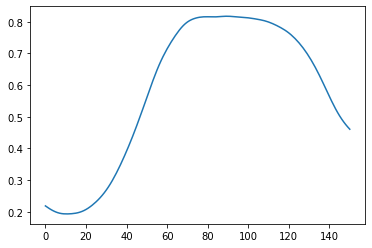

In [93]:
df_test_melhor.mean().plot()

In [94]:
array_test_mean=df_test_melhor.mean().values

In [95]:
df_test_melhor.mean().values

array([0.21842151, 0.21394781, 0.20975263, 0.20591425, 0.20250171,
       0.19958649, 0.19719619, 0.19539136, 0.19415737, 0.19343692,
       0.19313009, 0.19314537, 0.19338071, 0.19384383, 0.19452012,
       0.19550011, 0.19686218, 0.19867231, 0.20095975, 0.20377222,
       0.2071424 , 0.21105277, 0.21549329, 0.22039524, 0.22574254,
       0.23152433, 0.23778129, 0.24455197, 0.25190746, 0.25988692,
       0.26854547, 0.27792973, 0.2880384 , 0.2988534 , 0.31036586,
       0.32253623, 0.33531271, 0.34862654, 0.36245623, 0.37675002,
       0.39147379, 0.40663464, 0.42221782, 0.43823623, 0.45473422,
       0.47166815, 0.4889626 , 0.50659128, 0.52451745, 0.54261383,
       0.56075868, 0.57888331, 0.59683003, 0.61437416, 0.6313186 ,
       0.64748006, 0.66270864, 0.67699035, 0.69035876, 0.70285147,
       0.7145816 , 0.72568121, 0.73622683, 0.74626011, 0.75584464,
       0.76493086, 0.77341998, 0.78118335, 0.78809631, 0.79404748,
       0.79904578, 0.80314476, 0.80643026, 0.8090488 , 0.81115

In [96]:
seed=0

In [97]:
from tslearn.clustering import TimeSeriesKMeans

modelteste2 = TimeSeriesKMeans(n_clusters=2, metric="euclidean",
                         max_iter=1000,n_init=10, random_state=seed)
modelteste2.fit(df_test_melhor)

TimeSeriesKMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=0)

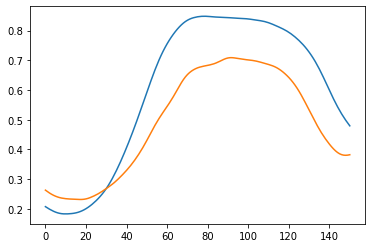

In [98]:
for x in modelteste2.cluster_centers_:
    plt.plot(x)

In [99]:
import tslearn.clustering
from tslearn.metrics import cdist_dtw
tslearn.clustering.silhouette_score(df_test_melhor, labels=modelteste2.labels_, metric="euclidean")

0.3937180723457594

In [100]:
modelteste2.inertia_

1.0381152913699345

In [101]:
modelteste2.cluster_centers_

array([[[0.20757197],
        [0.20322795],
        [0.19912396],
        [0.19535918],
        [0.19200094],
        [0.18912492],
        [0.18677875],
        [0.18503816],
        [0.18388976],
        [0.18328503],
        [0.18311156],
        [0.18328682],
        [0.18369998],
        [0.18436693],
        [0.1852918 ],
        [0.18659694],
        [0.18836105],
        [0.19065028],
        [0.19346484],
        [0.19681395],
        [0.20071015],
        [0.20512949],
        [0.21006487],
        [0.21546781],
        [0.22135523],
        [0.22771994],
        [0.23460048],
        [0.24205014],
        [0.2501419 ],
        [0.25895897],
        [0.26858963],
        [0.27908772],
        [0.29043932],
        [0.30263138],
        [0.3155932 ],
        [0.32925003],
        [0.34355964],
        [0.35847514],
        [0.37396687],
        [0.38997251],
        [0.40644838],
        [0.42338996],
        [0.44074576],
        [0.45851979],
        [0.47677264],
        [0

In [102]:
cluster_centersteste=[]
for x in modelteste2.cluster_centers_:
    abc=np.concatenate(x, axis=0)
    cluster_centersteste.append(abc)

In [103]:
x=np.arange(0,151)

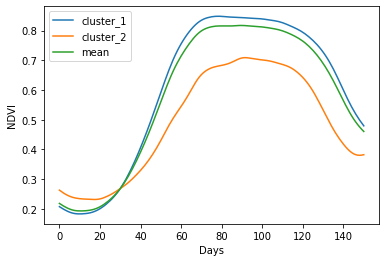

In [104]:
plt.plot(x, cluster_centersteste[0], "tab:blue", label="cluster_1")
plt.plot(x, cluster_centersteste[1], "tab:orange", label="cluster_2")
plt.plot(x, array_test_mean, "tab:green", label="mean")
plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("NDVI")
plt.show()

<AxesSubplot:>

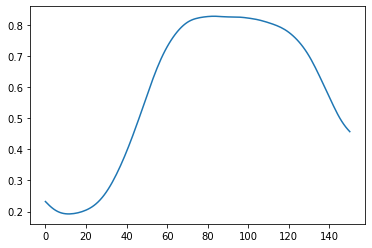

In [105]:
df_train_melhor.mean().plot()

In [106]:
df_train_melhor.mean().values

array([0.23241435, 0.2256977 , 0.21937508, 0.21359385, 0.20848622,
       0.2041227 , 0.20051848, 0.1976612 , 0.19551249, 0.19399926,
       0.19306708, 0.19262284, 0.19263002, 0.19302876, 0.19377737,
       0.19483128, 0.19620345, 0.19787709, 0.1998635 , 0.2021621 ,
       0.20482992, 0.20789709, 0.21141678, 0.21544943, 0.22008329,
       0.22536201, 0.23135047, 0.23807796, 0.24557036, 0.25384535,
       0.26292828, 0.27281204, 0.28348918, 0.29493524, 0.30711042,
       0.31994551, 0.33342057, 0.34749379, 0.36214638, 0.37736067,
       0.39315666, 0.40946829, 0.42625188, 0.44346746, 0.46107546,
       0.47901963, 0.49728976, 0.51584009, 0.53459517, 0.55342535,
       0.57221382, 0.59080752, 0.6090759 , 0.62688906, 0.6440944 ,
       0.66056354, 0.67621301, 0.69096193, 0.70476592, 0.71764217,
       0.72964983, 0.74082737, 0.7512336 , 0.76089916, 0.76983578,
       0.77804073, 0.78553356, 0.79232306, 0.79839063, 0.80372094,
       0.80831284, 0.81217646, 0.81533003, 0.817888  , 0.81997

In [107]:
array_train_mean=df_train_melhor.mean().values

In [108]:
seed=0

In [109]:
from tslearn.clustering import TimeSeriesKMeans

model2 = TimeSeriesKMeans(n_clusters=2, metric="euclidean",
                         max_iter=1000,n_init=10, random_state=seed)
model2.fit(df_train_melhor)

TimeSeriesKMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=0)

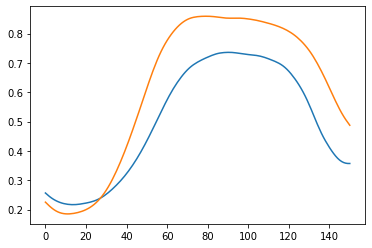

In [110]:
for x in model2.cluster_centers_:
    plt.plot(x)

In [111]:
import tslearn.clustering
from tslearn.metrics import cdist_dtw
tslearn.clustering.silhouette_score(df_train_melhor, labels=model2.labels_, metric="euclidean")

0.3748160191218966

In [112]:
model2.inertia_

1.0752640328478376

In [113]:
model2.cluster_centers_

array([[[0.25634284],
        [0.25016728],
        [0.24443826],
        [0.23927883],
        [0.23472998],
        [0.23080216],
        [0.22744872],
        [0.22459412],
        [0.22222153],
        [0.22031728],
        [0.21884152],
        [0.21772125],
        [0.21698289],
        [0.21660802],
        [0.21658252],
        [0.21687703],
        [0.21748961],
        [0.21835692],
        [0.21941742],
        [0.22060691],
        [0.22191461],
        [0.22335607],
        [0.22497765],
        [0.22687045],
        [0.22911755],
        [0.23177243],
        [0.23488951],
        [0.23848181],
        [0.24257175],
        [0.24714818],
        [0.25219221],
        [0.25768402],
        [0.26357581],
        [0.26977752],
        [0.27630276],
        [0.28313163],
        [0.29027066],
        [0.29774581],
        [0.30562045],
        [0.31388847],
        [0.32259656],
        [0.33172924],
        [0.34132492],
        [0.35135925],
        [0.36185588],
        [0

In [114]:
cluster_centers=[]
for x in model2.cluster_centers_:
    abc=np.concatenate(x, axis=0)
    cluster_centers.append(abc)

In [115]:
cluster_centers[0]

array([0.25634284, 0.25016728, 0.24443826, 0.23927883, 0.23472998,
       0.23080216, 0.22744872, 0.22459412, 0.22222153, 0.22031728,
       0.21884152, 0.21772125, 0.21698289, 0.21660802, 0.21658252,
       0.21687703, 0.21748961, 0.21835692, 0.21941742, 0.22060691,
       0.22191461, 0.22335607, 0.22497765, 0.22687045, 0.22911755,
       0.23177243, 0.23488951, 0.23848181, 0.24257175, 0.24714818,
       0.25219221, 0.25768402, 0.26357581, 0.26977752, 0.27630276,
       0.28313163, 0.29027066, 0.29774581, 0.30562045, 0.31388847,
       0.32259656, 0.33172924, 0.34132492, 0.35135925, 0.36185588,
       0.37281184, 0.38425904, 0.39616359, 0.40852897, 0.42134501,
       0.43453491, 0.44804875, 0.46185372, 0.47589394, 0.49011017,
       0.50444296, 0.51880942, 0.5331498 , 0.54732763, 0.56117719,
       0.57465413, 0.58764092, 0.60003986, 0.61177008, 0.62286932,
       0.63332454, 0.64318343, 0.65245825, 0.6611612 , 0.66920877,
       0.67653459, 0.68312017, 0.68895415, 0.69409309, 0.69868

In [116]:
cluster_centers2=cluster_centers

In [117]:
cluster_centers2[0]

array([0.25634284, 0.25016728, 0.24443826, 0.23927883, 0.23472998,
       0.23080216, 0.22744872, 0.22459412, 0.22222153, 0.22031728,
       0.21884152, 0.21772125, 0.21698289, 0.21660802, 0.21658252,
       0.21687703, 0.21748961, 0.21835692, 0.21941742, 0.22060691,
       0.22191461, 0.22335607, 0.22497765, 0.22687045, 0.22911755,
       0.23177243, 0.23488951, 0.23848181, 0.24257175, 0.24714818,
       0.25219221, 0.25768402, 0.26357581, 0.26977752, 0.27630276,
       0.28313163, 0.29027066, 0.29774581, 0.30562045, 0.31388847,
       0.32259656, 0.33172924, 0.34132492, 0.35135925, 0.36185588,
       0.37281184, 0.38425904, 0.39616359, 0.40852897, 0.42134501,
       0.43453491, 0.44804875, 0.46185372, 0.47589394, 0.49011017,
       0.50444296, 0.51880942, 0.5331498 , 0.54732763, 0.56117719,
       0.57465413, 0.58764092, 0.60003986, 0.61177008, 0.62286932,
       0.63332454, 0.64318343, 0.65245825, 0.6611612 , 0.66920877,
       0.67653459, 0.68312017, 0.68895415, 0.69409309, 0.69868

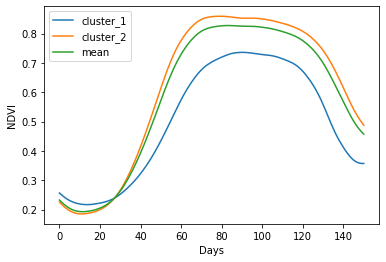

In [118]:
x=np.arange(0,151)

plt.plot(x, cluster_centers[0], "tab:blue", label="cluster_1")
plt.plot(x, cluster_centers[1], "tab:orange", label="cluster_2")
plt.plot(x, array_train_mean, "tab:green", label="mean")
plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("NDVI")
plt.show()

# Models

# Mean

## Linear

In [119]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

#X = NDVIbluesync.iloc[:,:-1].values
X=df_train_melhor.mean().values.reshape(-1,1)
#y = NDVIbluesync.iloc[:,1].values
y=df_kcteoric['Kcteoric'].values
Reg = linear_model.LinearRegression()
Reg.fit(X, y)
pred = Reg.predict(X)
print(Reg.coef_)
print(Reg.intercept_)

[1.48755479]
-0.047611917392626824


In [120]:
Reg.score(X, y)

0.9807366719397393

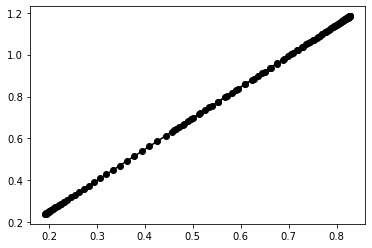

In [121]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
plt.plot(X, pred, color = 'Black', marker = 'o')

In [122]:
print(r2)
print(mse)

0.9807366719397393
0.002478894580340462


In [123]:
print(np.sqrt(mse))

0.04978849847445153


In [124]:
pred

array([0.29811716, 0.28812577, 0.27872054, 0.27012064, 0.26252275,
       0.25603178, 0.2506703 , 0.24641994, 0.24322362, 0.24097262,
       0.23958595, 0.23892511, 0.23893579, 0.23952894, 0.24064254,
       0.24221029, 0.24425146, 0.2467411 , 0.24969599, 0.25311528,
       0.25708381, 0.26164639, 0.26688213, 0.27288091, 0.27977404,
       0.28762642, 0.29653458, 0.3065421 , 0.31768745, 0.32999695,
       0.34350831, 0.35821094, 0.37409377, 0.39112041, 0.40923165,
       0.42832456, 0.44836945, 0.46930413, 0.49110067, 0.51373276,
       0.53723015, 0.5614946 , 0.5864611 , 0.61207022, 0.6382631 ,
       0.66495603, 0.69213385, 0.71972848, 0.74762769, 0.77563861,
       0.8035875 , 0.83124663, 0.85842186, 0.88491991, 0.91051379,
       0.93501254, 0.95829199, 0.98023182, 1.000766  , 1.01992014,
       1.03778218, 1.05440938, 1.06988922, 1.08426727, 1.09756098,
       1.1097663 , 1.1209123 , 1.13101205, 1.14003788, 1.14796702,
       1.15479772, 1.16054507, 1.16523618, 1.1690413 , 1.17214

In [125]:
y

array([0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.32195122, 0.34390244, 0.36585366, 0.38780488, 0.4097561 ,
       0.43170732, 0.45365854, 0.47560976, 0.49756098, 0.5195122 ,
       0.54146341, 0.56341463, 0.58536585, 0.60731707, 0.62926829,
       0.65121951, 0.67317073, 0.69512195, 0.71707317, 0.73902439,
       0.76097561, 0.78292683, 0.80487805, 0.82682927, 0.84878049,
       0.87073171, 0.89268293, 0.91463415, 0.93658537, 0.95853659,
       0.9804878 , 1.00243902, 1.02439024, 1.04634146, 1.06829268,
       1.0902439 , 1.11219512, 1.13414634, 1.15609756, 1.17804878,
       1.2       , 1.2       , 1.2       , 1.2       , 1.2    

In [126]:
frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': X.reshape(151,)}

plotazul = pd.DataFrame(frameplotazul)

<AxesSubplot:>

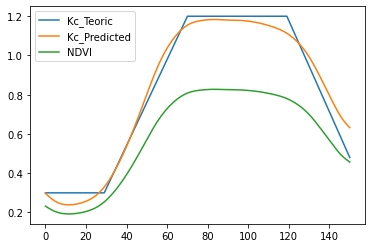

In [127]:
plotazul.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

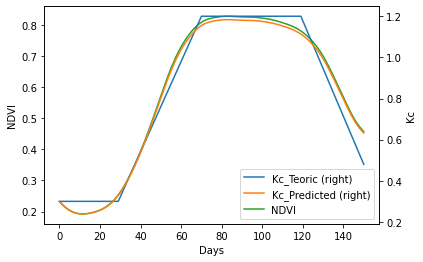

In [128]:
plt.figure()
ax = plotazul.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [129]:
#statsmodels

In [130]:
import statsmodels.api as sm
#performing the regression
Xa = sm.add_constant(X)
result = sm.OLS(y, Xa).fit()

# Result of statsmodels 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     7586.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          1.07e-129
Time:                        17:49:27   Log-Likelihood:                 238.74
No. Observations:                 151   AIC:                            -473.5
Df Residuals:                     149   BIC:                            -467.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0476      0.011     -4.398      0.0

In [131]:
result.resid.mean()

1.2094813745088625e-16

__Explain the Statistics__

__Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.__

__Method : Least Squares : Fit data to the model by minimizing the residual samples__

__R-quared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated.__

__Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.__

__F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means.__

__Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.__

__Log-Likelihood : The conditional probability that the observed data fits the model__

__AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.__

__Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.__

__BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.__

__Df Model : Number of parameters in the model__

__Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.__

__Independent Coefficient : Represents the change of the independent variable per unit.__

__Standard Error : Accuracy of the coefficients__

__P>|t| : The P Value. A P Value less than .05 is considered statistically significant.__

__[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.__

__Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.__

__Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated.__

__Prob(Omnibus) : Probability of Omnibus__

__Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution.__

__Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.__

__Prob(JB) : The probability of Jarque-Bera__

__Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.__

__Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.__

# Linear-Mean Test (correcto)

In [132]:
pred2 = Reg.predict(np.array(array_test_mean).reshape(-1,1))
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [133]:
r2

0.9789517049998441

In [134]:
rmse

0.05204413916790816

In [135]:
array_test_mean

array([0.21842151, 0.21394781, 0.20975263, 0.20591425, 0.20250171,
       0.19958649, 0.19719619, 0.19539136, 0.19415737, 0.19343692,
       0.19313009, 0.19314537, 0.19338071, 0.19384383, 0.19452012,
       0.19550011, 0.19686218, 0.19867231, 0.20095975, 0.20377222,
       0.2071424 , 0.21105277, 0.21549329, 0.22039524, 0.22574254,
       0.23152433, 0.23778129, 0.24455197, 0.25190746, 0.25988692,
       0.26854547, 0.27792973, 0.2880384 , 0.2988534 , 0.31036586,
       0.32253623, 0.33531271, 0.34862654, 0.36245623, 0.37675002,
       0.39147379, 0.40663464, 0.42221782, 0.43823623, 0.45473422,
       0.47166815, 0.4889626 , 0.50659128, 0.52451745, 0.54261383,
       0.56075868, 0.57888331, 0.59683003, 0.61437416, 0.6313186 ,
       0.64748006, 0.66270864, 0.67699035, 0.69035876, 0.70285147,
       0.7145816 , 0.72568121, 0.73622683, 0.74626011, 0.75584464,
       0.76493086, 0.77341998, 0.78118335, 0.78809631, 0.79404748,
       0.79904578, 0.80314476, 0.80643026, 0.8090488 , 0.81115

In [136]:
frameplotazulteste = { 'Kc_Teoric': y, 'Kc_Predicted': pred2, 'NDVI': array_test_mean}

plotazulteste = pd.DataFrame(frameplotazulteste)

<AxesSubplot:>

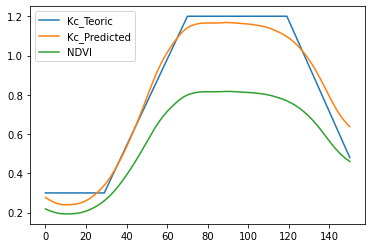

In [137]:
plotazulteste.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

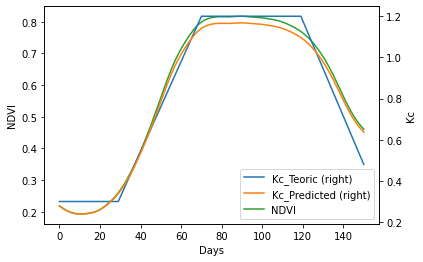

In [138]:
plt.figure()
ax = plotazulteste.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

## Polinomial

In [139]:
X2=X.reshape(151,)

In [140]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(X2, y, 5))

print(r2_score(y, mymodel(X2)))

0.9948837149789597


In [141]:
print(mymodel)

        5         4         3         2
-98.01 x + 248.9 x - 239.2 x + 108.7 x - 22.14 x + 1.922


In [142]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(X2))))

RMSE for Polynomial Regression=> 0.02565905949635164


In [143]:
r2_score(y,mymodel(X2))

0.9948837149789597

In [144]:
print(metrics.mean_absolute_error(y,mymodel(X2)))
print(metrics.mean_squared_error(y,mymodel(X2)))
print(np.sqrt(metrics.mean_absolute_error(y,mymodel(X2))))

0.01685850637871858
0.0006583873342373133
0.12984031106986219


In [145]:
frameplotazul4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(X2), 'NDVI': X2.reshape(151,)}
plotazul4 = pd.DataFrame(frameplotazul4)

<AxesSubplot:>

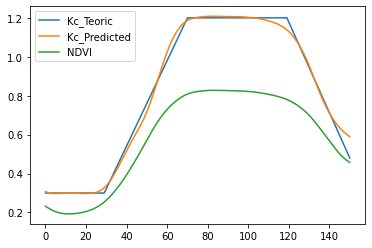

In [146]:
plotazul4.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

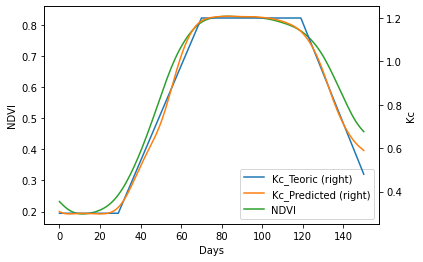

In [147]:
plt.figure()
ax = plotazul4.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Polynomial-Mean Test (correcto)

In [148]:
pred2 = mymodel(array_test_mean)
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [149]:
r2

0.9930300441697981

In [150]:
rmse

0.029948728000052337

In [151]:
frameplotazulteste2 = { "Kc_Theoretical": y, 'Kc_Predicted': mymodel(array_test_mean), 'NDVI': array_test_mean}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

<AxesSubplot:>

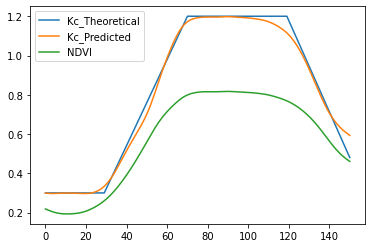

In [152]:
plotazulteste2.plot()

Text(0.5, 1.0, 'Mean No Pre-Selection (Polynomial)')

<Figure size 432x288 with 0 Axes>

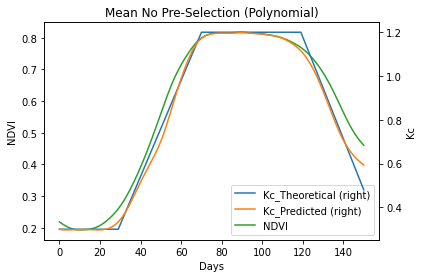

In [153]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Theoretical","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')
ax.set_title("Mean No Pre-Selection (Polynomial)")

# Cluster

In [154]:
red=cluster_centers2[1].reshape(-1,1)

In [155]:
red2=cluster_centers2[1]

## Linear

In [156]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

#X = NDVIbluesync.iloc[:,:-1].values
X=df_train_melhor.mean().values.reshape(-1,1)
#y = NDVIbluesync.iloc[:,1].values
y=df_kcteoric['Kcteoric'].values
Reg = linear_model.LinearRegression()
Reg.fit(red, y)
pred = Reg.predict(red)
print(Reg.coef_)
print(Reg.intercept_)

[1.39348928]
-0.028825054629220692


In [157]:
Reg.score(red, y)

0.96790256571424

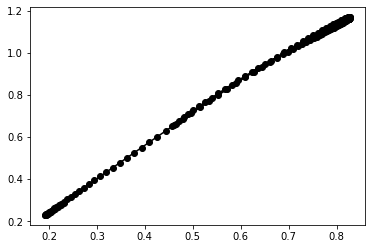

In [158]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
plt.plot(X, pred, color = 'Black', marker = 'o')

In [159]:
print(r2)
print(mse)

0.96790256571424
0.004130447015432678


In [160]:
print(np.sqrt(mse))

0.0642685538613767


In [161]:
pred

array([0.28487946, 0.27529008, 0.26622749, 0.25790732, 0.25055258,
       0.24428703, 0.23915807, 0.23517534, 0.23227623, 0.23033363,
       0.2292655 , 0.22893357, 0.2292602 , 0.23014439, 0.23151633,
       0.23330747, 0.23554216, 0.23821681, 0.24137808, 0.24505219,
       0.2493474 , 0.25431191, 0.26002269, 0.26655093, 0.27402183,
       0.282492  , 0.29205631, 0.30276252, 0.31464811, 0.32775   ,
       0.34212228, 0.35776043, 0.37467125, 0.39284847, 0.41221397,
       0.43265036, 0.45411861, 0.47653168, 0.4998285 , 0.52397952,
       0.54900127, 0.57478024, 0.60122068, 0.62826027, 0.65581702,
       0.68378991, 0.71214682, 0.74081896, 0.76966765, 0.79846149,
       0.82702074, 0.85508825, 0.88244065, 0.90886546, 0.93411038,
       0.95796725, 0.98031952, 1.00104549, 1.02012242, 1.03765199,
       1.05376053, 1.06856792, 1.08222259, 1.09481459, 1.10634921,
       1.11682704, 1.12626337, 1.13466894, 1.14200479, 1.14827852,
       1.15351618, 1.15774409, 1.16100019, 1.16346856, 1.16530

In [162]:
y

array([0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.32195122, 0.34390244, 0.36585366, 0.38780488, 0.4097561 ,
       0.43170732, 0.45365854, 0.47560976, 0.49756098, 0.5195122 ,
       0.54146341, 0.56341463, 0.58536585, 0.60731707, 0.62926829,
       0.65121951, 0.67317073, 0.69512195, 0.71707317, 0.73902439,
       0.76097561, 0.78292683, 0.80487805, 0.82682927, 0.84878049,
       0.87073171, 0.89268293, 0.91463415, 0.93658537, 0.95853659,
       0.9804878 , 1.00243902, 1.02439024, 1.04634146, 1.06829268,
       1.0902439 , 1.11219512, 1.13414634, 1.15609756, 1.17804878,
       1.2       , 1.2       , 1.2       , 1.2       , 1.2    

In [163]:
frameplotred = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': red.reshape(151,)}

plotred = pd.DataFrame(frameplotred)

<AxesSubplot:>

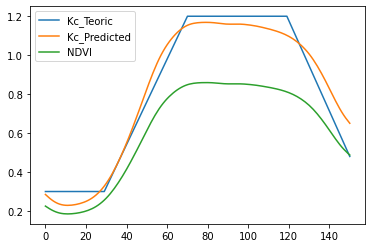

In [164]:
plotred.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

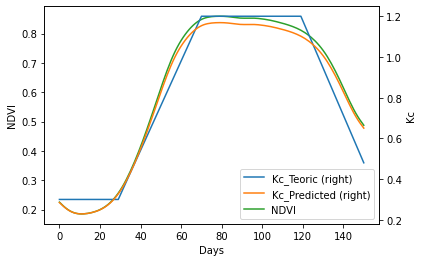

In [165]:
plt.figure()
ax = plotred.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [166]:
#statsmodels

In [167]:
import statsmodels.api as sm
#performing the regression
Xa = sm.add_constant(red)
result = sm.OLS(y, Xa).fit()

# Result of statsmodels 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     4493.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          3.58e-113
Time:                        17:49:29   Log-Likelihood:                 200.19
No. Observations:                 151   AIC:                            -396.4
Df Residuals:                     149   BIC:                            -390.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0288      0.014     -2.090      0.0

In [168]:
result.resid.mean()

-2.8307010892760613e-16

__Explain the Statistics__

__Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.__

__Method : Least Squares : Fit data to the model by minimizing the residual samples__

__R-quared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated.__

__Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.__

__F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means.__

__Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.__

__Log-Likelihood : The conditional probability that the observed data fits the model__

__AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.__

__Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.__

__BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.__

__Df Model : Number of parameters in the model__

__Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.__

__Independent Coefficient : Represents the change of the independent variable per unit.__

__Standard Error : Accuracy of the coefficients__

__P>|t| : The P Value. A P Value less than .05 is considered statistically significant.__

__[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.__

__Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.__

__Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated.__

__Prob(Omnibus) : Probability of Omnibus__

__Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution.__

__Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.__

__Prob(JB) : The probability of Jarque-Bera__

__Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.__

__Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.__

# Linear-Mean Test (correcto)

In [169]:
pred2 = Reg.predict(np.array(cluster_centersteste[0]).reshape(-1,1))
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [170]:
r2

0.9694886582350597

In [171]:
rmse

0.06266052392497296

In [172]:
frameplotazulteste2 = { 'Kc_Teoric': y, 'Kc_Predicted': pred2, 'NDVI': cluster_centersteste[0]}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

<AxesSubplot:>

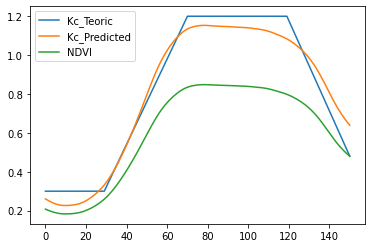

In [173]:
plotazulteste2.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

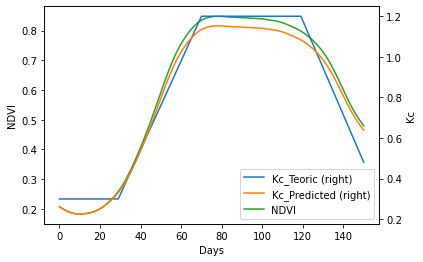

In [174]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

## Polinomial

In [175]:
X2=X.reshape(151,)

In [176]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(red2, y, 5))

print(r2_score(y, mymodel(red2)))

0.9931082926155016


In [177]:
print(mymodel)

        5         4         3         2
-84.49 x + 222.6 x - 220.2 x + 102.1 x - 21.07 x + 1.858


In [178]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(red2))))

RMSE for Polynomial Regression=> 0.029780143303407374


In [179]:
r2_score(y,mymodel(red2))

0.9931082926155016

In [180]:
print(metrics.mean_absolute_error(y,mymodel(red2)))
print(metrics.mean_squared_error(y,mymodel(red2)))
print(np.sqrt(metrics.mean_absolute_error(y,mymodel(red2))))

0.019528075791940207
0.0008868569351714791
0.13974289174029642


In [181]:
frameplotred4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(red2), 'NDVI': red2.reshape(151,)}
plotred4 = pd.DataFrame(frameplotred4)

<AxesSubplot:>

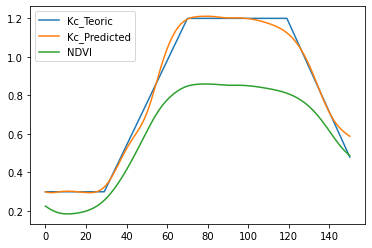

In [182]:
plotred4.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

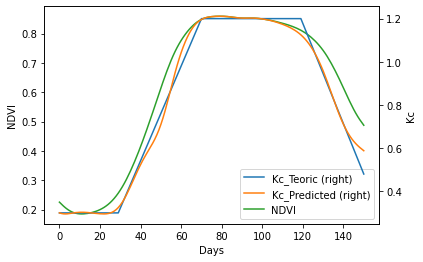

In [183]:
plt.figure()
ax = plotred4.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Polynomial-Mean Test (correcto)

In [184]:
pred2 = mymodel(cluster_centersteste[0])
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [185]:
r2

0.9896271668926565

In [186]:
rmse

0.03653524834429944

In [187]:
frameplotazulteste2 = { "Kc_Theoretical": y, 'Kc_Predicted': mymodel(cluster_centersteste[0]), 'NDVI': cluster_centersteste[0]}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

<AxesSubplot:>

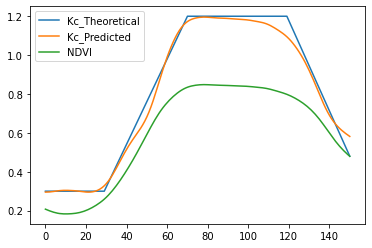

In [188]:
plotazulteste2.plot()

Text(0.5, 1.0, 'K-Means No Pre-Selection (Polynomial)')

<Figure size 432x288 with 0 Axes>

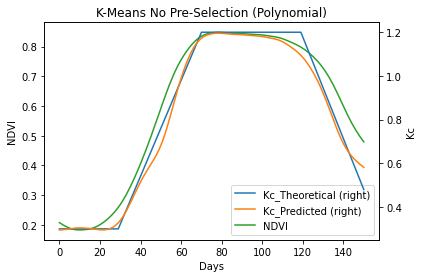

In [189]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Theoretical","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')
ax.set_title("K-Means No Pre-Selection (Polynomial)")